In [1]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt
from ellc import ldy,lc
logger = phoebe.logger('error')
%matplotlib inline

In [2]:
phoebe.__version__

'2.4.9'

### fake observations

In [3]:
orig = phoebe.default_binary()

#b['period@orbit'] = 0.5
#b['sma@orbit'] = 3.5
orig.set_value('ecc', 0.2)
orig.set_value('per0', 25)
orig.set_value('teff@primary', 6500)
orig.set_value('teff@secondary', 5500)
orig.set_value('sma@binary', 7)
orig.set_value('incl@binary', 83.5)
orig.set_value('q', 0.66)
orig.set_value('t0_supconj', 0.1)
orig.set_value('requiv@primary', 1.3)
orig.set_value('requiv@secondary', 0.9)
orig.set_value('vgamma', 80)

lctimes = phoebe.linspace(0, 10, 1005)
rvtimes = phoebe.linspace(0, 10, 105)
orig.add_dataset('lc', compute_times=lctimes)
orig.add_dataset('rv', compute_times=rvtimes)

orig.add_compute('ellc', compute='fastcompute')
orig.set_value_all('ld_mode', 'lookup')

orig.run_compute(compute='fastcompute')

fluxes = orig.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.01
fsigmas = np.ones_like(lctimes) * 0.02

rvsA = orig.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsB = orig.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsigmas = np.ones_like(rvtimes) * 20




true_values=(83.5,1.2,0.8,5500)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 47.78it/s]


In [4]:
print(fsigmas)

[0.02 0.02 0.02 ... 0.02 0.02 0.02]


In [5]:
print(orig.filter(context='component'))

ParameterSet: 62 parameters
         requiv@primary@component: 1.3 solRad
C    requiv_max@primary@component: 2.410930801415005 solRad
           teff@primary@component: 6500.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.653053591820842
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 83.5 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: 2.772507081987546 solMass
       requiv@secondary@component: 0.9 solRad
C  requiv_max@secondary@component: 1.9826527748101817 solRad
         t

In [6]:
print(orig.get_parameter(context='component',component='binary', qualifier='period'))
orig.get_parameter(context='component',component='binary', qualifier='period').get_description()

Parameter: period@binary@component
                       Qualifier: period
                     Description: Orbital period (defined at t0@system, sidereal: wrt the sky)
                           Value: 1.0 d
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, period_anom@binary@component, mean_anom@binary@component, freq@binary@component, mass@primary@component, period@primary@component, mass@secondary@component, period@secondary@component, compute_phases@lc01@dataset, compute_phases@rv01@dataset
                      Related to: t0_supconj@binary@component, ecc@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, period_anom@binary@component, mean_anom@binary@component, freq@binary@component, sma@binary@component, q@binary@component, mass@primary@component, syncpar@primary@component, period@primary@component, mas

'Orbital period (defined at t0@system, sidereal: wrt the sky)'

In [7]:
print(orig.get_parameter(qualifier='pblum_mode'))

Parameter: pblum_mode@lc01@dataset
                       Qualifier: pblum_mode
                     Description: Mode for scaling passband luminosities
                           Value: component-coupled
                         Choices: decoupled, component-coupled, dataset-coupled, dataset-scaled, absolute
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [8]:
print(orig.get_parameter(context='constraint',component='secondary', qualifier='logg'))

Constrains (qualifier): logg
Expression in solar units (value): log10((({mass@secondary@component} / ({requiv@secondary@component} ** 2.000000)) * 2942.206218) * 9.319541)
Current Result (result): 4.791999213097734


In [9]:
print(orig.get_parameter('mass@primary@component'))
print(orig.get_parameter('mass@secondary@component'))

Parameter: mass@primary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 2.772507081987546 solMass
                  Constrained by: sma@binary@component, period@binary@component, q@binary@component
                      Constrains: logg@primary@component, mass@secondary@component
                      Related to: requiv@primary@component, logg@primary@component, sma@binary@component, period@binary@component, q@binary@component, mass@secondary@component

Parameter: mass@secondary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 1.8298546741117807 solMass
                  Constrained by: sma@binary@component, period@binary@component, q@binary@component
                      Constrains: logg@secondary@component, mass@primary@component
                      Related to: requiv@secondary@component, logg@secondary@component, sma@binary@component, 

## Save Model

In [10]:
#orig.set_value_all('ld_mode', 'lookup')
#orig.run_compute('fastcompute')

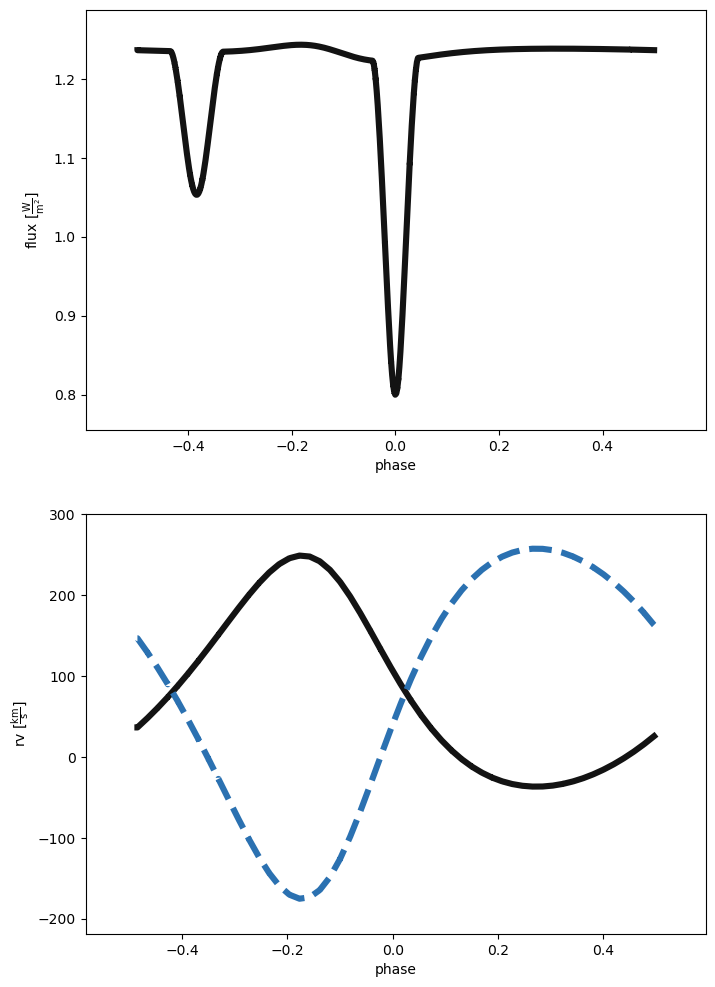

In [11]:
afig, mplfig = orig.plot(x='phases', show=True)

In [12]:
#times = b.get_value('times', context='model')
#fluxes = b.get_value('fluxes', context='model') + np.random.normal(size=times.shape) * 0.01
#sigmas = np.ones_like(times) * 0.01

#np.savetxt('data2.lc', np.vstack((times,fluxes,sigmas)).T)

In [13]:
#(time_arr,flux_arr,sigma_arr) = np.loadtxt('data2.lc',unpack=True)
#plt.errorbar(time_arr,flux_arr,yerr=sigma_arr,fmt='.')

In [14]:
print(fluxes)
print(lctimes)

[1.22598286 1.23173892 1.22860115 ... 1.23544417 1.24125565 1.24099326]
<linspace start=0.0 stop=10.0 num=1005 endpoint=True unit=None>


In [15]:
b = phoebe.default_binary() 
b.set_value('latex_repr', component='binary', value='orb')
b.set_value('latex_repr', component='primary', value='1')
b.set_value('latex_repr', component='secondary', value='2')

b.add_dataset('lc', 
              
compute_phases=phoebe.linspace(0,1,101),
              times=lctimes, 
              fluxes=fluxes, 
              sigmas=fsigmas, 
              dataset='lc01')


b.add_dataset('rv', 
              compute_phases=phoebe.linspace(0,1,101),
              times=rvtimes, 
              rvs={'primary': rvsA, 'secondary': rvsB}, 
              sigmas=rvsigmas,
              dataset='rv01')

b.set_value_all('ld_mode', 'lookup')

In [16]:
len('compute_phases@rv01@dataset')

27

In [17]:
len('compute_phases@lc01@dataset')

27

In [18]:
len('phases_t0@rv01@dataset')

22

In [19]:
len('phases_t0@lc01@dataset')

22

In [20]:
#What we Know
b.set_value('period@orbit',1)
b.set_value('teff@primary', 6500)
b.set_value('sma@binary', 7)

In [21]:

q_list= [0.5]
r2_list=[0.6]

In [22]:
#Give our best guess at the things we don't know 
b.set_value('incl@binary', 83)
b.set_value('requiv@primary', 1.3)
b.set_value('teff@secondary', 5500)
b.set_value('requiv@secondary',0.8)
b.set_value('q',0.8)



In [23]:
print(b.get_parameter('mass@primary@component'))
print(b.get_parameter('mass@secondary@component'))

Parameter: mass@primary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 2.556867642277404 solMass
                  Constrained by: sma@binary@component, period@binary@component, q@binary@component
                      Constrains: logg@primary@component, mass@secondary@component
                      Related to: requiv@primary@component, logg@primary@component, sma@binary@component, period@binary@component, q@binary@component, mass@secondary@component

Parameter: mass@secondary@component
                       Qualifier: mass
                     Description: Mass
                           Value: 2.045494113821923 solMass
                  Constrained by: sma@binary@component, period@binary@component, q@binary@component
                      Constrains: logg@secondary@component, mass@primary@component
                      Related to: requiv@secondary@component, logg@secondary@component, sma@binary@component, p

In [24]:
b.datasets

['lc01', 'rv01']

In [25]:
print(b.filter(context='dataset',kind='rv'))

ParameterSet: 24 parameters
C      compute_times@rv01@dataset: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
      compute_phases@rv01@dataset: [0.   0.01 0.02 ... 0.98 0.99 1.  ]
           phases_t0@rv01@dataset: t0_supconj
        mask_enabled@rv01@dataset: True
         mask_phases@rv01@dataset: []
        solver_times@rv01@dataset: auto
            passband@rv01@dataset: Johnson:V
    intens_weighting@rv01@dataset: energy
       times@primary@rv01@dataset: [ 0.          0.09615385  0.19230769 ...
  9.80769231  9.90384615 10.        ] d
     times@secondary@rv01@dataset: [ 0.          0.09615385  0.19230769 ...
  9.80769231  9.90384615 10.        ] d
         rvs@primary@rv01@dataset: [232.03858139 110.55139124  26.75656994 ...
 191.6773573  237.15786039 209.71977065] km / s
       rvs@secondary@rv01@dataset: [-145.48332204   32.33950166  175.14011423 ...
  -87.54790664 -161.49881111 -109.51627412] km / s
      sigmas@primary@rv01@dataset: [20. 20. 20. ... 20. 20. 20.] km / s
    sigmas@se

C:\Users\dylan\anaconda3\lib\site-packages\phoebe\dependencies\autofig\call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


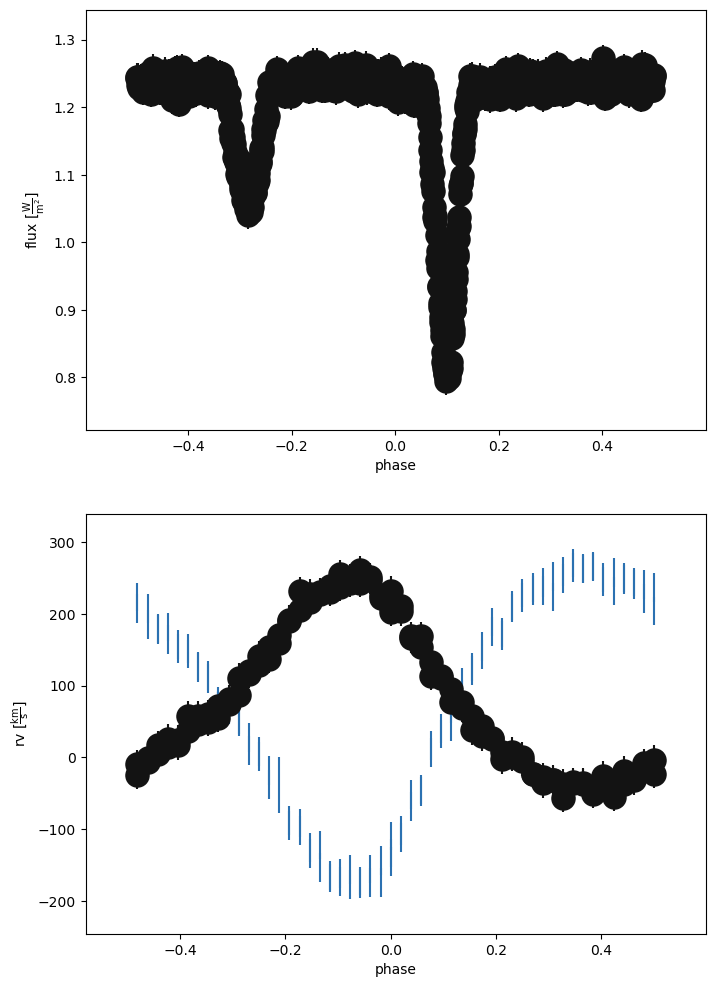

In [26]:
afig, mplfig = b.plot(x='phases', show=True)

In [27]:
print(b.filter('teff'))


ParameterSet: 2 parameters
           teff@primary@component: 6500.0 K
         teff@secondary@component: 5500.0 K


### Adding in rv_geometry estimator

In [28]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [29]:
b.add_solver('estimator.rv_geometry',
             rv='rv01')

<ParameterSet: 7 parameters | qualifiers: rv_datasets, orbit, expose_model, comments, phase_nbins, phase_bin, use_server>

In [30]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [31]:
b.run_solver(kind='rv_geometry', solution='rv_geom_sol')

<ParameterSet: 17 parameters | components: secondary, primary>

In [32]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [33]:
print(b.adopt_solution('rv_geom_sol', trial_run=True))

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.12405349370289931 d
         q@binary@orbit@component: 0.6748865244722312
     asini@binary@orbit@component: 7.485339852961424 solRad
       ecc@binary@orbit@component: 0.14064851434455677
      per0@binary@orbit@component: 36.429335003807864 deg
                    vgamma@system: 79.47308521979681 km / s


In [34]:
print()

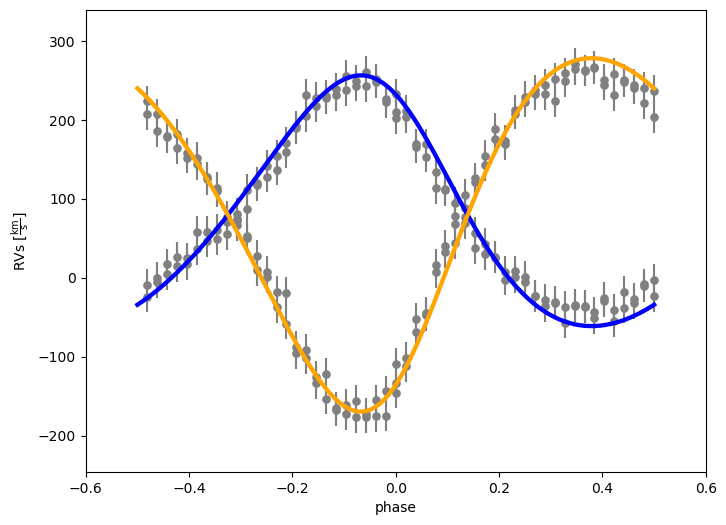

In [35]:
afig, mplfig = b.plot(solution='rv_geom_sol',
                      show=True, save='figure_rv_geometry.pdf')

### Adding in lc_geometry  Estimator 

In [36]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [37]:
b.add_solver('estimator.lc_geometry',
             lc='lc01')

<ParameterSet: 11 parameters | qualifiers: analytical_model, lc_combine, orbit, expose_model, comments, lc_datasets, phase_nbins, interactive, phase_bin, t0_near_times, use_server>

In [38]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [39]:
b.run_solver(kind='lc_geometry', solution='lc_geom_sol')

<ParameterSet: 21 parameters | qualifiers: adopt_parameters, input_phases, analytic_fluxes, secondary_phase, input_fluxes, primary_depth, primary_width, primary_phase, fitted_twigs, comments, analytic_phases, fitted_units, secondary_width, analytic_best_model, orbit, adopt_distributions, fitted_values, adopt_values, input_sigmas, eclipse_edges, secondary_depth>

In [40]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [41]:
print(b.adopt_solution('lc_geom_sol', trial_run=True))

ParameterSet: 5 parameters
   t0_supconj@binary@orbit@com...: 0.1010991528765582 d
       ecc@binary@orbit@component: 0.17707809617732265
      per0@binary@orbit@component: 10.466750352973087 deg
   requivsumfrac@binary@orbit@...: 0.2893573902532259
   teffratio@binary@orbit@comp...: 0.8744816860134701


C:\Users\dylan\anaconda3\lib\site-packages\phoebe\dependencies\autofig\call.py:1097: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([x, y])
C:\Users\dylan\anaconda3\lib\site-packages\phoebe\dependencies\autofig\call.py:1098: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([x, y]).T.reshape(-1, 1, 2)


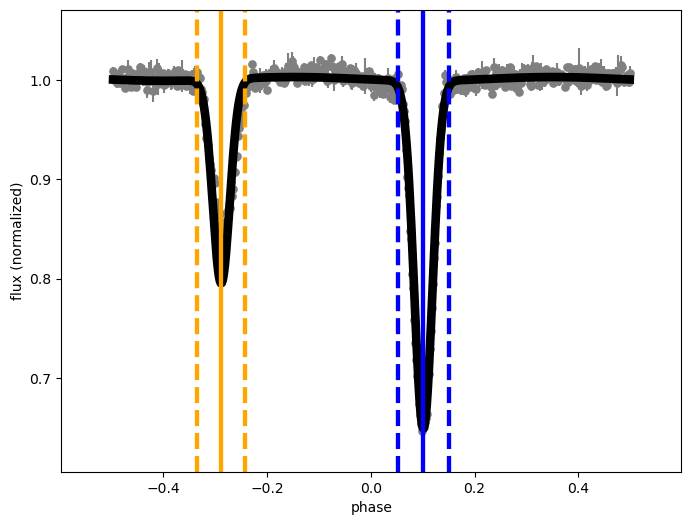

In [42]:
afig, mplfig = b.plot(solution='lc_geom_sol',
                      show=True, save='figure_lc_geometry.pdf')

In [43]:
b.solutions

['rv_geom_sol', 'lc_geom_sol']

In [44]:
b.adopt_solution('lc_geom_sol', adopt_parameters='mask_phases')

<ParameterSet: 1 parameters>

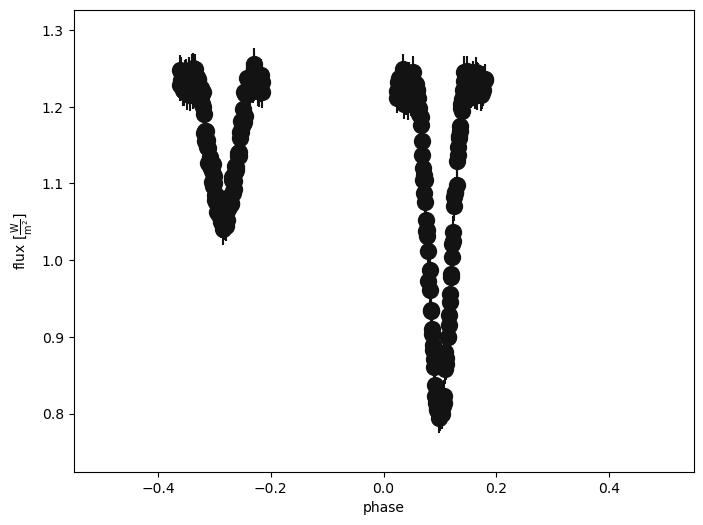

In [45]:
_ = b.plot(context='dataset', dataset='lc01', x='phases', xlim=(-0.55,0.55),
           save='figure_lc_geometry_mask.pdf', show=True)

In [46]:
b.set_value('mask_enabled@lc01', False)

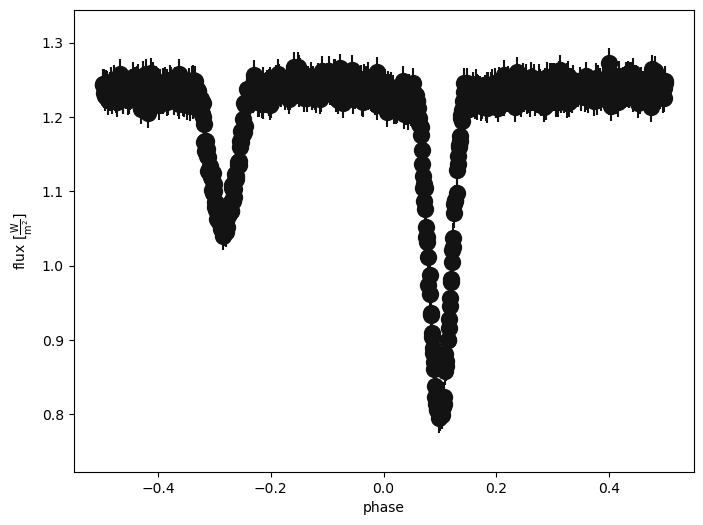

In [47]:
_ = b.plot(context='dataset', dataset='lc01', x='phases', xlim=(-0.55,0.55), show=True)

### Running ebai estimator

In [48]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 0 parameters
NO PARAMETERS


In [49]:
b.add_solver('estimator.ebai',
             lc='lc01')

<ParameterSet: 8 parameters | qualifiers: lc_combine, orbit, ebai_method, comments, lc_datasets, phase_nbins, phase_bin, use_server>

In [50]:
b.run_solver(kind='ebai', solution='ebai_sol')

<ParameterSet: 13 parameters | qualifiers: orbit, adopt_parameters, adopt_distributions, ebai_phases, input_phases, fitted_twigs, comments, fitted_values, adopt_values, input_sigmas, ebai_fluxes, input_fluxes, fitted_units>

In [51]:
print(b.filter( 'input_sigmas@ebai01@ebai_sol'))

ParameterSet: 1 parameters
R  input_sigmas@ebai01@ebai_so...: [0.00423095 0.00408444 0.00509886
 ... 0.00189461 0.00466344
 0.00704377]


In [52]:
print(b.adopt_solution('ebai_sol', trial_run=True))

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.09780278884462129 d
   teffratio@binary@orbit@comp...: 0.81087103155076
   requivsumfrac@binary@orbit@...: 0.3342936854865514
     esinw@binary@orbit@component: 0.12468090867224306
     ecosw@binary@orbit@component: 0.15556183537028995
      incl@binary@orbit@component: 81.13878663572564 deg


In [53]:
print(b.get_solution('ebai_sol').filter(qualifier=['message', 'nfev', 'niter', 'success']))

ParameterSet: 0 parameters
NO PARAMETERS


C:\Users\dylan\anaconda3\lib\site-packages\phoebe\dependencies\autofig\call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


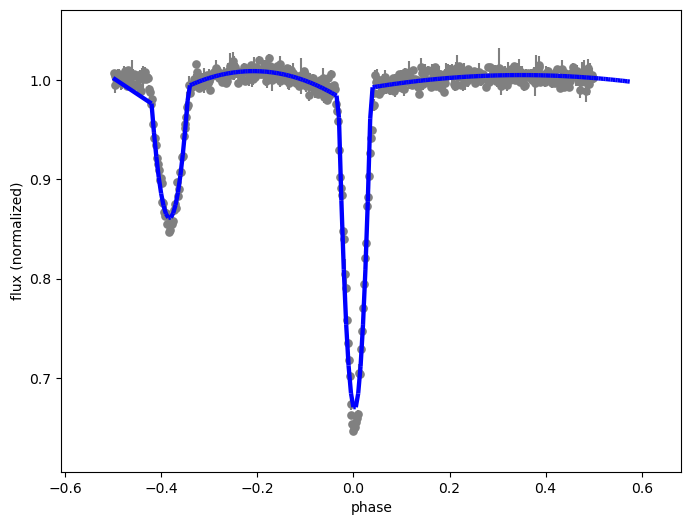

In [54]:
afig, mplfig = b.plot(solution='ebai_sol',
                      show=True, save='figure_ebai.pdf')

### Adopting solutions from RV and LC estimators

In [55]:
b.flip_constraint('asini@binary', solve_for='sma@binary')
b.adopt_solution('rv_geom_sol')

<ParameterSet: 26 parameters | contexts: component, system, dataset>

In [56]:
print(b.filter('q@binary@orbit@component'))

ParameterSet: 1 parameters
               q@binary@component: 0.6748865244722312


In [57]:
print(b.filter(qualifier='per0',component='binary'))

ParameterSet: 1 parameters
            per0@binary@component: 36.429335003807864 deg


### Adopting solution from ebai estimator

In [58]:
b.flip_constraint('teffratio', solve_for='teff@secondary')
b.flip_constraint('requivsumfrac', solve_for='requiv@primary')

<ConstraintParameter: {requiv@primary@component} = ({requivsumfrac@binary@component} * {sma@binary@component}) - {requiv@secondary@component} (solar units) => 1.3 solRad>

In [59]:
b.adopt_solution('ebai_sol', adopt_parameters=['teffratio', 'requivsumfrac', 'incl'])

<ParameterSet: 19 parameters | kinds: star, orbit>

In [60]:
print(b.filter(qualifier=['logg'], context='component'))


ParameterSet: 2 parameters
C          logg@primary@component: 4.502686614532229
C        logg@secondary@component: 5.003098510265446


In [61]:
print(b.filter(qualifier=['ecc', 'per0', 'teff', 'sma', 'incl', 'q', 'requiv','mass','logg'], context='component'))
b.save('success_ebai_run3_q_0.5_1.0_5550.bundle')

ParameterSet: 17 parameters
C        requiv@primary@component: 1.7325291745190643 solRad
           teff@primary@component: 6500.0 K
C          logg@primary@component: 4.502686614532229
C          incl@primary@component: 81.13878663572564 deg
C          mass@primary@component: 3.4832135035922804 solMass
       requiv@secondary@component: 0.8 solRad
C        teff@secondary@component: 5270.6617050799405 K
C        logg@secondary@component: 5.003098510265446
C        incl@secondary@component: 81.13878663572564 deg
C        mass@secondary@component: 2.350773855434138 solMass
            per0@binary@component: 36.429335003807864 deg
             ecc@binary@component: 0.14064851434455677
            incl@binary@component: 81.13878663572564 deg
               q@binary@component: 0.6748865244722312
C            sma@binary@component: 7.5757613274479505 solRad
C           sma@primary@component: 3.052612316003651 solRad
C         sma@secondary@component: 4.523149011444299 solRad


'success_ebai_run3_q_0.5_1.0_5550.bundle'

In [62]:
print(b.filter(qualifier=['ecc', 'per0', 'teff', 'sma', 'incl', 'q', 'requiv','mass','logg'], context='component')) 

ParameterSet: 17 parameters
C        requiv@primary@component: 1.7325291745190643 solRad
           teff@primary@component: 6500.0 K
C          logg@primary@component: 4.502686614532229
C          incl@primary@component: 81.13878663572564 deg
C          mass@primary@component: 3.4832135035922804 solMass
       requiv@secondary@component: 0.8 solRad
C        teff@secondary@component: 5270.6617050799405 K
C        logg@secondary@component: 5.003098510265446
C        incl@secondary@component: 81.13878663572564 deg
C        mass@secondary@component: 2.350773855434138 solMass
            per0@binary@component: 36.429335003807864 deg
             ecc@binary@component: 0.14064851434455677
            incl@binary@component: 81.13878663572564 deg
               q@binary@component: 0.6748865244722312
C            sma@binary@component: 7.5757613274479505 solRad
C           sma@primary@component: 3.052612316003651 solRad
C         sma@secondary@component: 4.523149011444299 solRad


In [63]:
b.set_value_all('pblum_mode', 'dataset-scaled')

In [64]:
b.get_parameter(context='compute', qualifier='irrad_method').set_value("none")

In [65]:
print(b.get_solution('ebai_sol').filter(qualifier=['message', 'nfev', 'niter', 'success']))

ParameterSet: 0 parameters
NO PARAMETERS


In [66]:

b.set_value_all('atm', 'blackbody', context='compute')
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_coeffs', [0.3, 0.2]) 


In [67]:
b.run_compute(irrad_method='none', model='after_estimators', overwrite=True)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:03<00:00, 27.84it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

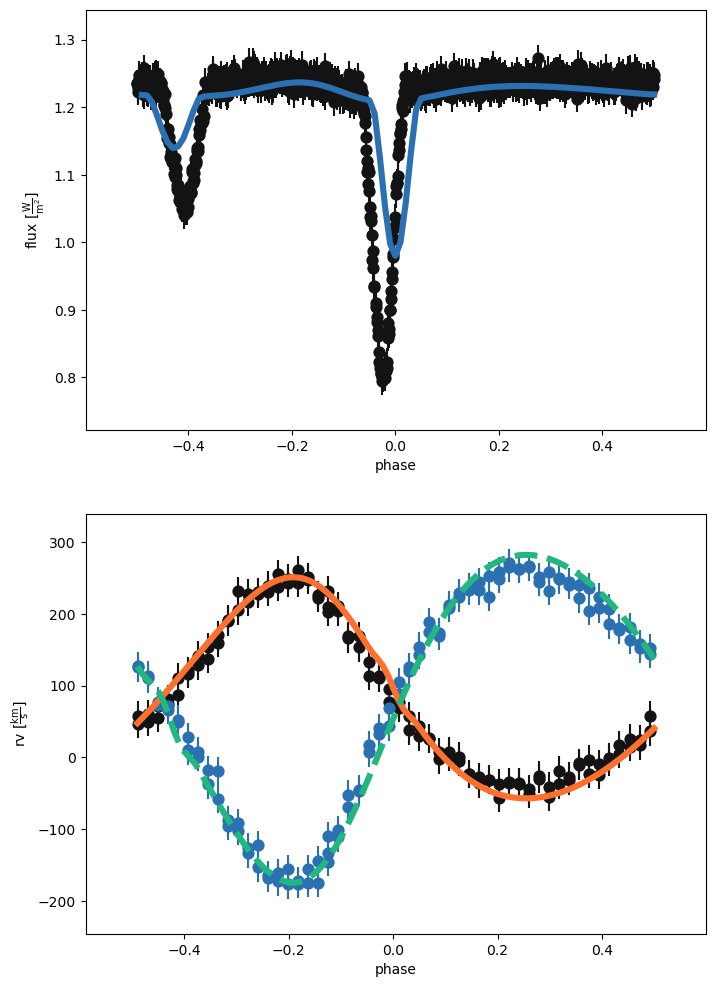

In [68]:
_ = b.plot(x='phases', m='.', show=True)

### Adding in nelder-mead optimizer 

In [69]:
b.add_compute('ellc', compute='fastcompute')

<ParameterSet: 34 parameters | datasets: _default, lc01, rv01>

In [70]:
b.add_solver('optimizer.nelder_mead',
             fit_parameters=['teffratio', 'requivsumfrac', 'incl@binary', 'q', 'ecc', 'per0'],
             compute='fastcompute')

<ParameterSet: 14 parameters | qualifiers: progress_every_niters, maxiter, fit_parameters, priors_combine, initial_values, compute, comments, fatol, priors, xatol, expose_lnprobabilities, continue_from, adaptive, use_server>

In [71]:
print(b.get_solver(kind='nelder_mead'))

ParameterSet: 13 parameters
    comments@nelder_mead01@solver: 
   use_server@nelder_mead01@so...: compute
     compute@nelder_mead01@solver: fastcompute
   expose_lnprobabilities@neld...: False
   continue_from@nelder_mead01...: None
   fit_parameters@nelder_mead0...: ['teffratio', 'requivsumfrac', 'incl@binary', 'q', 'ecc', 'per0']
   initial_values@nelder_mead0...: {}
      priors@nelder_mead01@solver: []
     maxiter@nelder_mead01@solver: 1000000
    adaptive@nelder_mead01@solver: False
       xatol@nelder_mead01@solver: 0.0001
       fatol@nelder_mead01@solver: 0.0001
   progress_every_niters@nelde...: 0


In [72]:
b.run_solver(kind='nelder_mead', maxiter=100, solution='nm_sol',overwrite=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:27<00:00,  1.47s/it]


<ParameterSet: 11 parameters | qualifiers: success, adopt_distributions, adopt_parameters, niter, initial_values, fitted_twigs, comments, fitted_values, message, adopt_values, fitted_units>

In [73]:
print(b.get_value(solution=('nm_sol'), qualifier='success'))

False


In [74]:
print(b.get_solution('nm_sol').filter(qualifier=[ 'success']))

ParameterSet: 1 parameters
R         success@nm_sol@solution: False


In [75]:
print(b.adopt_solution('nm_sol', trial_run=True))

ParameterSet: 6 parameters
   teffratio@binary@orbit@comp...: 0.8811609732004164
   requivsumfrac@binary@orbit@...: 0.38001574551040274
      incl@binary@orbit@component: 91.4637683160163 deg
         q@binary@orbit@component: 0.7073281766065405
       ecc@binary@orbit@component: 0.15137606788186408
      per0@binary@orbit@component: 19.270788349806352 deg


In [76]:
b.adopt_solution('nm_sol')

<ParameterSet: 29 parameters | contexts: component, dataset>

In [77]:
b.run_compute(compute='fastcompute',model='after_nm')

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 191.97it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

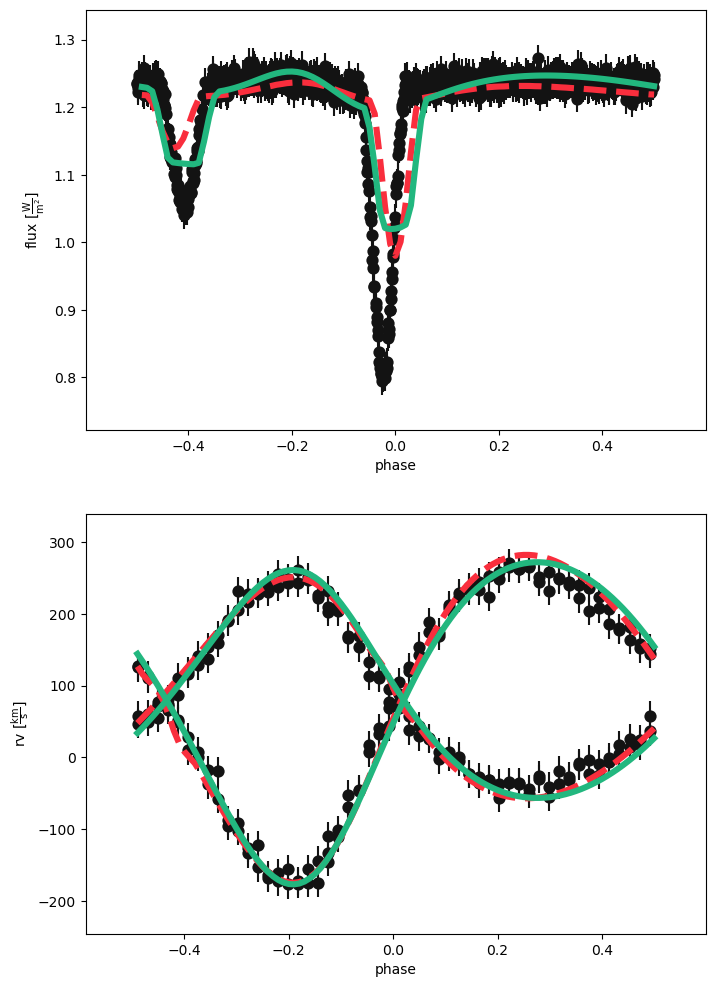

In [78]:
_ = b.plot(x='phases', 
           c={'after_estimators': 'red', 'after_nm': 'green', 'dataset': 'black'}, 
           linestyle={'after_estimators': 'dashed', 'after_nm': 'solid'},
           marker={'dataset': '.'},
           save='figure_optimizer_nm.pdf', show=True)

In [79]:
b.run_compute(compute='phoebe01', model='after_nm_phoebe')

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:03<00:00, 28.07it/s]


<ParameterSet: 8 parameters | kinds: rv, lc>

C:\Users\dylan\anaconda3\lib\site-packages\phoebe\dependencies\autofig\call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


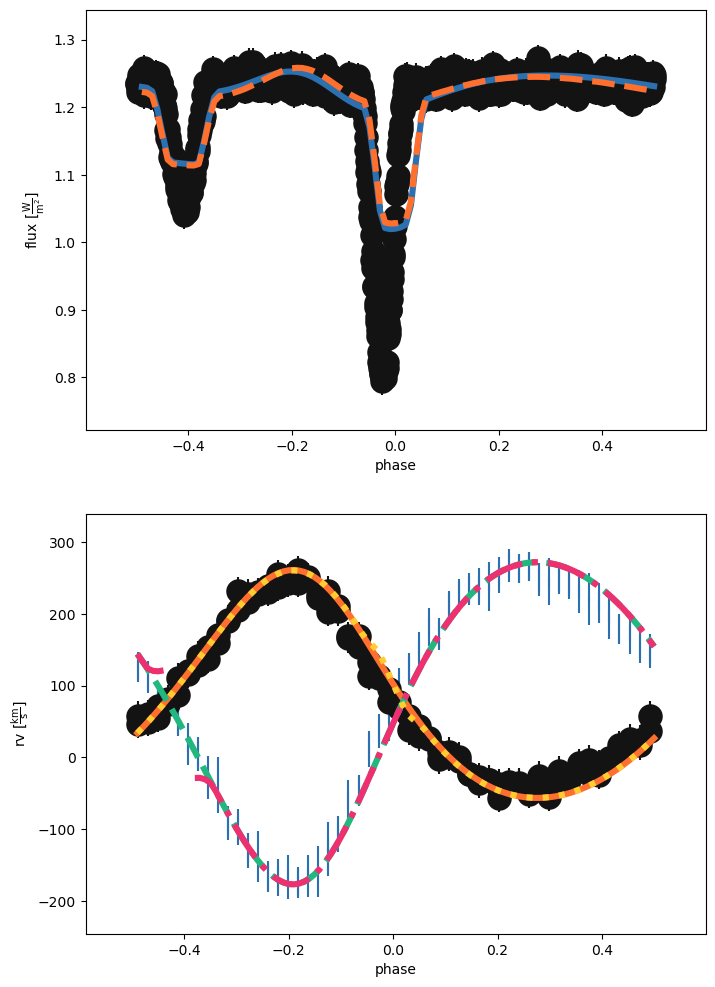

In [80]:
_ = b.plot(x='phases', model='after_nm*', show=True)

In [81]:
print(b.filter(qualifier=['ecc', 'per0', 'teff', 'sma', 'incl', 'q', 'requiv','logg'], context='component'))
b.save('success_nelder_run3_q_0.5_r2_1.0_5550.bundle')

ParameterSet: 15 parameters
C        requiv@primary@component: 2.0454755447142947 solRad
           teff@primary@component: 6500.0 K
C          logg@primary@component: 4.334908471569274
C          incl@primary@component: 91.4637683160163 deg
       requiv@secondary@component: 0.8 solRad
C        teff@secondary@component: 5727.5463258027075 K
C        logg@secondary@component: 4.999938039308445
C        incl@secondary@component: 91.4637683160163 deg
            per0@binary@component: 19.270788349806352 deg
             ecc@binary@component: 0.15137606788186408
            incl@binary@component: 91.4637683160163 deg
               q@binary@component: 0.7073281766065405
C            sma@binary@component: 7.4877832782757725 solRad
C           sma@primary@component: 3.1021101658233223 solRad
C         sma@secondary@component: 4.38567311245245 solRad


'success_nelder_run3_q_0.5_r2_1.0_5550.bundle'